In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('./introduction.ipynb'))))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from ylearn.estimator_model.causal_tree import CausalTree, CTCausalForest
from ylearn.exp_dataset.exp_data import sq_data
from ylearn.utils._common import to_df

In [3]:
n = 2000
d = 10     
n_x = 1
y, x, v = sq_data(n, d, n_x)

true_te = lambda X: np.hstack([X[:, [0]]**2 + 1, np.ones((X.shape[0], n_x - 1))])

v_test = v[:min(100, n)].copy()
v_test[:, 0] = np.linspace(np.percentile(v[:, 0], 1), np.percentile(v[:, 0], 99), min(100, n))

In [4]:
data = to_df(treatment=x, outcome=y, v=v)
test_data = to_df(v=v_test)

outcome = 'outcome'
treatment = 'treatment'
adjustment = data.columns[2:]

11-14 16:07:27 I ylearn.e.causal_tree.py 901 - Start building the causal tree with criterion HonestCMSE
11-14 16:07:27 I ylearn.e.causal_tree.py 917 - Building the causal tree with splitter BestSplitter
11-14 16:07:27 I ylearn.e.causal_tree.py 947 - Building the causal tree with builder DepthFirstTreeBuilder
11-14 16:07:27 I ylearn.e.causal_tree.py 424 - Start estimating the causal effect with the type of None.


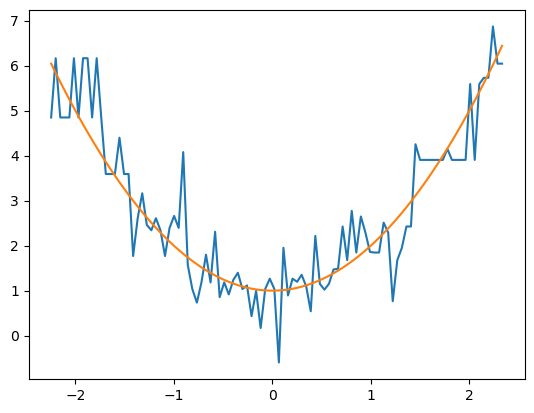

In [6]:
ct = CausalTree(
    splitter='best',
    min_samples_split=10,
    max_features=1.0,
    # min_weight_fraction_leaf=0.1,
    random_state=20,
    min_samples_leaf=2,
    max_depth=100,
    min_impurity_decrease=1e-10,
    honest_subsample_num=0.5,
    # max_leaf_nodes=10000,
)
ct.fit(
    data=data,
    outcome=outcome,
    treatment=treatment,
    adjustment=adjustment
)
ct_pred = ct.estimate(data=test_data)
for t in range(n_x):
    plt.plot(v_test[:, 0], ct_pred[:, t])
    plt.plot(v_test[:, 0], true_te(v_test)[:, t])
plt.show()

[Text(0.27850877192982454, 0.9285714285714286, 'v_0 <= -1.725\nsamples = 1000\nvalue = 1.942'),
 Text(0.07017543859649122, 0.7857142857142857, 'v_2 <= 0.644\nsamples = 38\nvalue = 6.157'),
 Text(0.03508771929824561, 0.6428571428571429, 'samples = 30\nvalue = 4.848'),
 Text(0.10526315789473684, 0.6428571428571429, 'samples = 8\nvalue = 6.165'),
 Text(0.4868421052631579, 0.7857142857142857, 'v_0 <= -0.871\nsamples = 962\nvalue = 1.912'),
 Text(0.17543859649122806, 0.6428571428571429, 'v_9 <= -1.115\nsamples = 164\nvalue = 2.897'),
 Text(0.14035087719298245, 0.5, 'samples = 20\nvalue = 2.961'),
 Text(0.21052631578947367, 0.5, 'v_4 <= -1.045\nsamples = 144\nvalue = 2.847'),
 Text(0.12280701754385964, 0.35714285714285715, 'v_6 <= 1.592\nsamples = 22\nvalue = 4.189'),
 Text(0.08771929824561403, 0.21428571428571427, 'samples = 20\nvalue = 2.66'),
 Text(0.15789473684210525, 0.21428571428571427, 'samples = 2\nvalue = 4.079'),
 Text(0.2982456140350877, 0.35714285714285715, 'v_0 <= -1.433\nsample

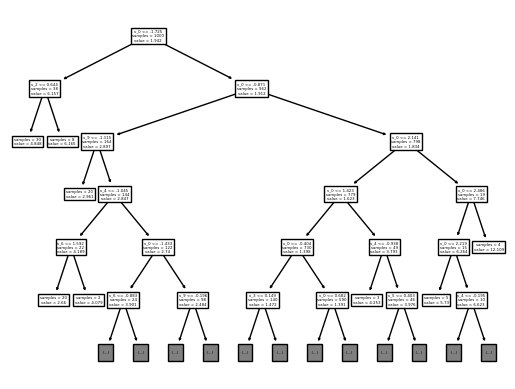

In [8]:
ct.criterion = 'honest'
ct.plot_causal_tree(max_depth=5, feature_names=adjustment)